In [16]:
import datetime
import time
import numpy as np
import pandas as pd
from packaging import version
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

In [13]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions))))

In [9]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

Model 1

In [10]:
model1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
start_time = time.time()
history1 = model1.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_1 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_1}s')

Epoch 1/10
1407/1407 [==============================] - 27s 18ms/step - loss: 1.9271 - accuracy: 0.3094 - val_loss: 1.9574 - val_accuracy: 0.3014
Epoch 2/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7100 - accuracy: 0.3854 - val_loss: 1.7188 - val_accuracy: 0.3904
Epoch 3/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6370 - accuracy: 0.4154 - val_loss: 1.7958 - val_accuracy: 0.3768
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5996 - accuracy: 0.4307 - val_loss: 1.7388 - val_accuracy: 0.3984
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5742 - accuracy: 0.4439 - val_loss: 1.7710 - val_accuracy: 0.4024
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5588 - accuracy: 0.4483 - val_loss: 1.6128 - val_accuracy: 0.4342
Epoch 7/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5405 - accuracy: 0.4536 - val_loss: 1.7489 -

In [22]:
test_loss1, test_acc1 = model1.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc1}, Test loss: {test_loss1}")

313/313 - 2s - loss: 1.6624 - accuracy: 0.4288 - 2s/epoch - 6ms/step
Test accuracy: 0.42879998683929443, Test loss: 1.662449598312378


In [24]:
pred1= model1.predict(test_images)
pred1=np.argmax(pred1, axis=1)

313/313 [==============================] - 2s 7ms/step


In [28]:
print_validation_report(np.argmax(test_labels, axis=1), pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.27      0.38      1000
           1       0.40      0.66      0.50      1000
           2       0.30      0.37      0.33      1000
           3       0.38      0.16      0.23      1000
           4       0.45      0.34      0.39      1000
           5       0.44      0.26      0.33      1000
           6       0.41      0.63      0.50      1000
           7       0.55      0.47      0.51      1000
           8       0.42      0.73      0.53      1000
           9       0.50      0.39      0.44      1000

    accuracy                           0.43     10000
   macro avg       0.45      0.43      0.41     10000
weighted avg       0.45      0.43      0.41     10000

Accuracy Score: 0.4288
Root Mean Square Error: 3.4025725561698166


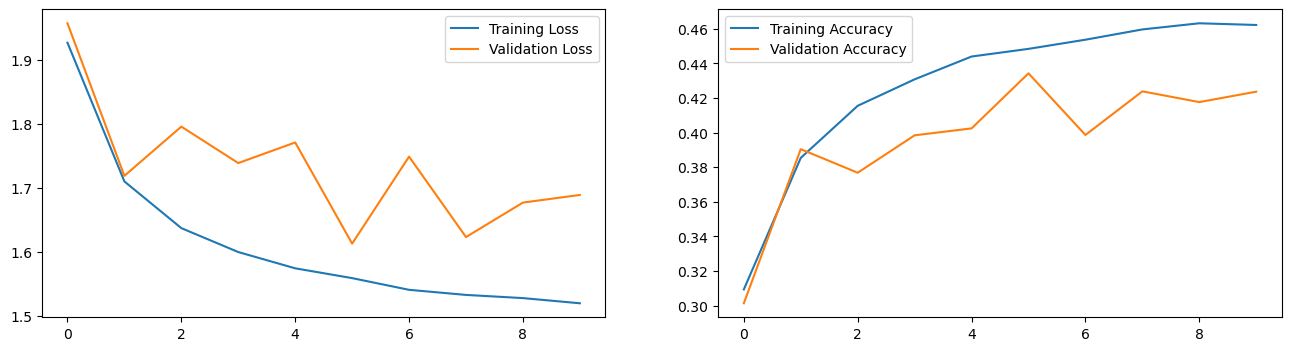

In [26]:
plot_history(history1)

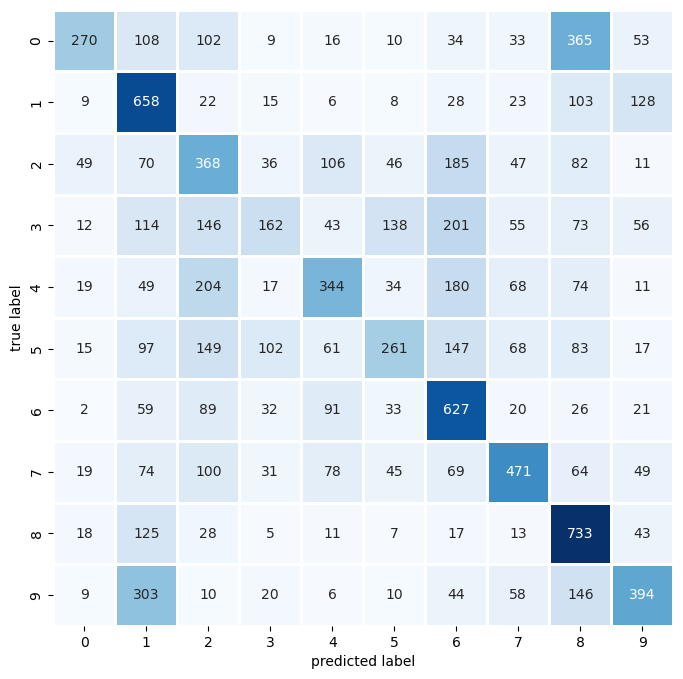

In [29]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred1)

Model 2

In [30]:
model2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
start_time = time.time()
history2 = model2.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_2 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_2}s')

Epoch 1/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5934 - accuracy: 0.4332 - val_loss: 1.9768 - val_accuracy: 0.3382
Epoch 2/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5730 - accuracy: 0.4415 - val_loss: 1.6446 - val_accuracy: 0.4246
Epoch 3/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5609 - accuracy: 0.4457 - val_loss: 1.8117 - val_accuracy: 0.3950
Epoch 4/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5552 - accuracy: 0.4480 - val_loss: 1.6760 - val_accuracy: 0.4260
Epoch 5/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5435 - accuracy: 0.4545 - val_loss: 1.5836 - val_accuracy: 0.4432
Epoch 6/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5363 - accuracy: 0.4586 - val_loss: 1.6767 - val_accuracy: 0.4134
Epoch 7/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5222 - accuracy: 0.4615 - val_loss: 1.8955 -

In [37]:
test_loss2, test_acc2 = model2.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc2}, Test loss: {test_loss2}")

313/313 - 2s - loss: 1.8684 - accuracy: 0.4057 - 2s/epoch - 6ms/step
Test accuracy: 0.4056999981403351, Test loss: 1.868379831314087


In [38]:
pred2= model2.predict(test_images)
pred2=np.argmax(pred2, axis=1)

313/313 [==============================] - 2s 7ms/step


In [39]:
print_validation_report(np.argmax(test_labels, axis=1), pred2)

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.56      0.49      1000
           1       0.37      0.77      0.50      1000
           2       0.40      0.16      0.23      1000
           3       0.34      0.24      0.28      1000
           4       0.45      0.20      0.28      1000
           5       0.50      0.16      0.24      1000
           6       0.66      0.25      0.37      1000
           7       0.31      0.69      0.42      1000
           8       0.48      0.66      0.55      1000
           9       0.49      0.36      0.41      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.38     10000
weighted avg       0.44      0.41      0.38     10000

Accuracy Score: 0.4057
Root Mean Square Error: 3.507463470943069


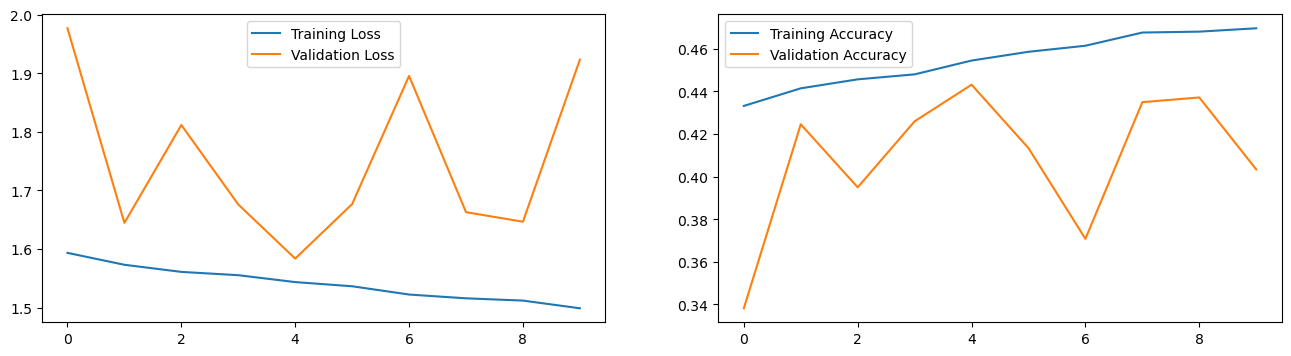

In [40]:
plot_history(history2)

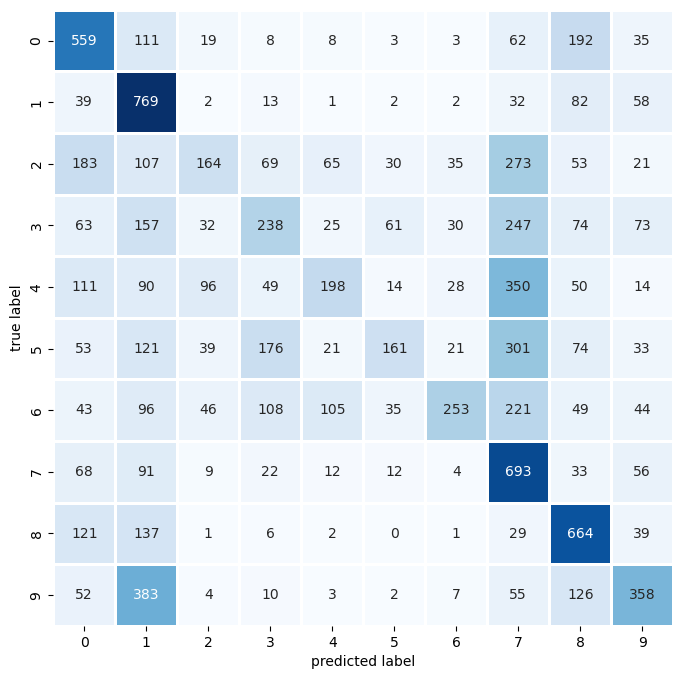

In [41]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred2)

Model 3

In [172]:
## Must rerun with names

model3 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2, name="max_pooling1"),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2, name="max_pooling2"),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    layers.Dense(10, activation='softmax')
])

In [173]:
model3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [174]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling1 (MaxPooling2D  (None, 15, 15, 128)       0         
 )                                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2 (MaxPooling2D  (None, 6, 6, 256)         0         
 )                                                               
                                                                 
 flatten_18 (Flatten)        (None, 9216)              0         
                                                                 
 dense_46 (Dense)            (None, 384)             

In [175]:
start_time = time.time()
history3 = model3.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_3 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_3}s')

Epoch 1/10
1407/1407 [==============================] - 160s 112ms/step - loss: 2.1749 - accuracy: 0.1957 - val_loss: 2.0292 - val_accuracy: 0.2462
Epoch 2/10
1407/1407 [==============================] - 162s 115ms/step - loss: 1.9322 - accuracy: 0.2775 - val_loss: 1.9993 - val_accuracy: 0.2584
Epoch 3/10
1407/1407 [==============================] - 173s 123ms/step - loss: 1.7278 - accuracy: 0.3373 - val_loss: 1.6680 - val_accuracy: 0.3354
Epoch 4/10
1407/1407 [==============================] - 164s 117ms/step - loss: 1.5895 - accuracy: 0.3636 - val_loss: 1.6435 - val_accuracy: 0.3364
Epoch 5/10
1407/1407 [==============================] - 169s 120ms/step - loss: 1.5110 - accuracy: 0.3830 - val_loss: 1.4701 - val_accuracy: 0.3904
Epoch 6/10
1407/1407 [==============================] - 167s 119ms/step - loss: 1.4547 - accuracy: 0.4020 - val_loss: 1.4480 - val_accuracy: 0.3998
Epoch 7/10
1407/1407 [==============================] - 159s 113ms/step - loss: 1.4050 - accuracy: 0.4164 - val_

In [176]:
test_loss3, test_acc3 = model3.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc3}, Test loss: {test_loss3}")

313/313 - 11s - loss: 1.4142 - accuracy: 0.4337 - 11s/epoch - 35ms/step
Test accuracy: 0.43369999527931213, Test loss: 1.4141641855239868


In [177]:
pred3= model3.predict(test_images)
pred3=np.argmax(pred3, axis=1)

313/313 [==============================] - 11s 36ms/step


In [178]:
print_validation_report(np.argmax(test_labels, axis=1), pred3)

Classification Report
              precision    recall  f1-score   support

           0       0.41      0.28      0.34      1000
           1       0.51      0.86      0.64      1000
           2       0.35      0.24      0.28      1000
           3       0.27      0.08      0.12      1000
           4       0.36      0.30      0.32      1000
           5       0.30      0.20      0.24      1000
           6       0.37      0.69      0.48      1000
           7       0.61      0.79      0.69      1000
           8       0.54      0.70      0.61      1000
           9       0.29      0.20      0.23      1000

    accuracy                           0.43     10000
   macro avg       0.40      0.43      0.40     10000
weighted avg       0.40      0.43      0.40     10000

Accuracy Score: 0.4337
Root Mean Square Error: 3.702850253520928


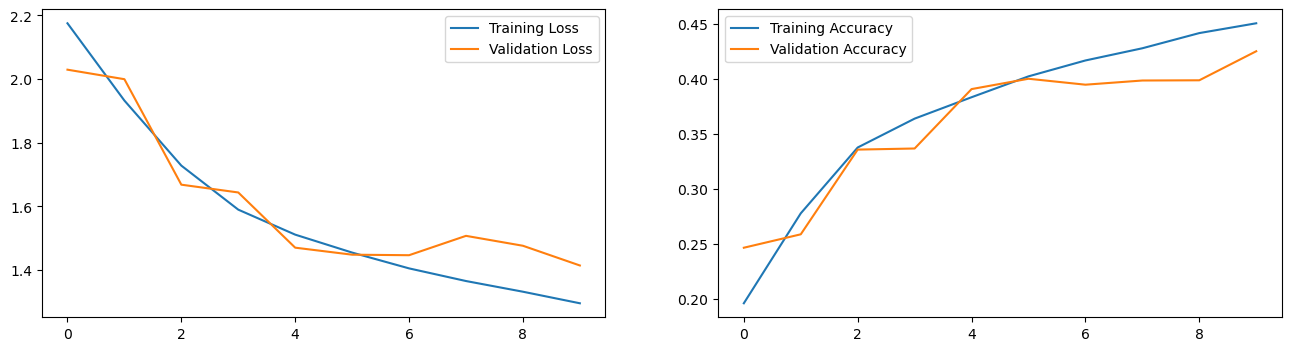

In [179]:
plot_history(history3)

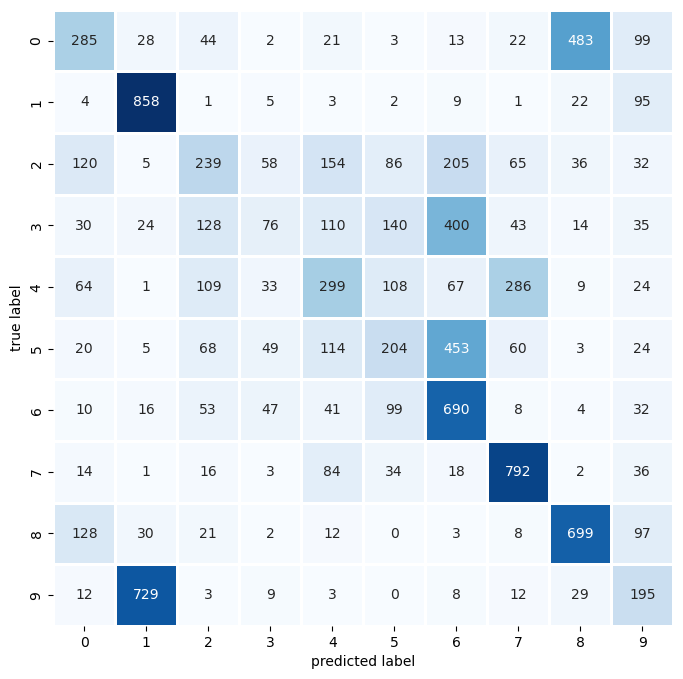

In [180]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred3)

Results 2

In [196]:
layer_names = []
for layer in model3.layers[:4]:
    layer_names.append(layer.name)


In [197]:
layer_names

['conv2d_26', 'max_pooling1', 'conv2d_27', 'max_pooling2']

In [198]:
layer_names = layer_names[1:4:2]

C:\Users\ianre\AppData\Local\Temp\ipykernel_27180\1714600980.py:26: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


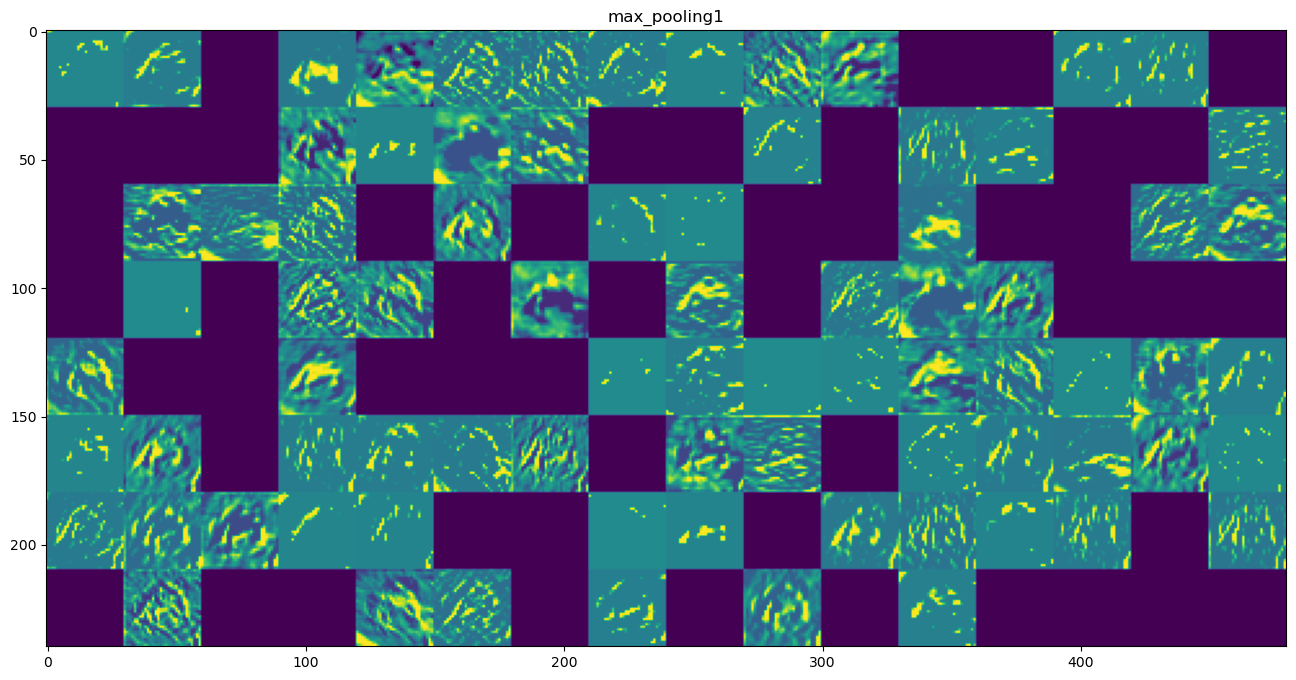

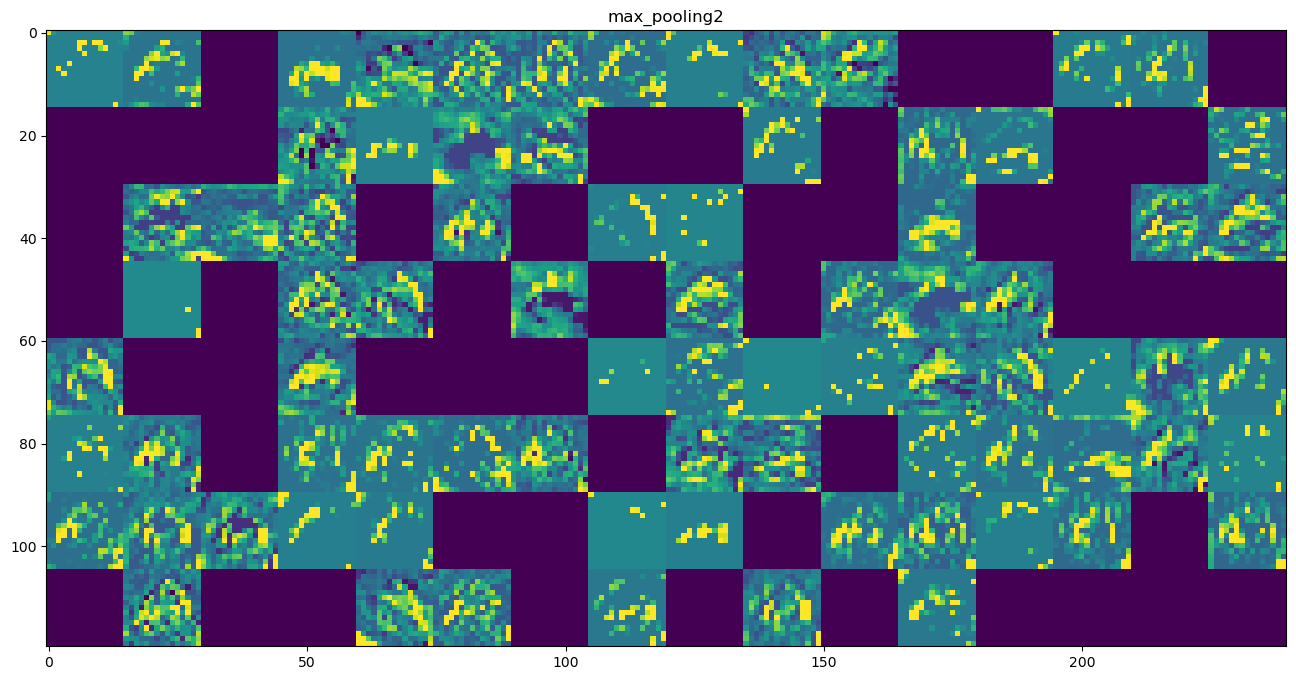

In [199]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show();

Model 4

In [91]:
model4 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    # Third convolutional layer
    layers.Conv2D(512, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    layers.Dense(10, activation='softmax')
])

In [92]:
model4.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 512)         1180160   
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 2, 2, 512)        

In [94]:
start_time = time.time()
history4 = model4.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_4 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_4}s')

Epoch 1/10
1407/1407 [==============================] - 241s 170ms/step - loss: 2.1929 - accuracy: 0.1681 - val_loss: 2.1748 - val_accuracy: 0.1632
Epoch 2/10
1407/1407 [==============================] - 259s 184ms/step - loss: 1.9608 - accuracy: 0.2328 - val_loss: 2.0263 - val_accuracy: 0.2210
Epoch 3/10
1407/1407 [==============================] - 248s 176ms/step - loss: 1.8039 - accuracy: 0.3050 - val_loss: 1.7306 - val_accuracy: 0.3134
Epoch 4/10
1407/1407 [==============================] - 240s 171ms/step - loss: 1.6602 - accuracy: 0.3693 - val_loss: 1.6135 - val_accuracy: 0.3966
Epoch 5/10
1407/1407 [==============================] - 240s 170ms/step - loss: 1.5220 - accuracy: 0.4388 - val_loss: 1.5751 - val_accuracy: 0.4390
Epoch 6/10
1407/1407 [==============================] - 241s 171ms/step - loss: 1.3755 - accuracy: 0.5080 - val_loss: 1.3662 - val_accuracy: 0.5212
Epoch 7/10
1407/1407 [==============================] - 245s 174ms/step - loss: 1.2407 - accuracy: 0.5542 - val_

In [95]:
test_loss4, test_acc4 = model4.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc4}, Test loss: {test_loss4}")

313/313 - 20s - loss: 1.2925 - accuracy: 0.5421 - 20s/epoch - 63ms/step
Test accuracy: 0.5421000123023987, Test loss: 1.292498230934143


In [96]:
pred4= model4.predict(test_images)
pred4=np.argmax(pred4, axis=1)

313/313 [==============================] - 20s 63ms/step


In [97]:
print_validation_report(np.argmax(test_labels, axis=1), pred4)

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.45      0.51      1000
           1       0.59      0.83      0.69      1000
           2       0.25      0.17      0.21      1000
           3       0.37      0.26      0.31      1000
           4       0.46      0.43      0.45      1000
           5       0.52      0.56      0.54      1000
           6       0.56      0.79      0.65      1000
           7       0.69      0.69      0.69      1000
           8       0.49      0.48      0.49      1000
           9       0.75      0.76      0.75      1000

    accuracy                           0.54     10000
   macro avg       0.53      0.54      0.53     10000
weighted avg       0.53      0.54      0.53     10000

Accuracy Score: 0.5421
Root Mean Square Error: 3.1025473404929698


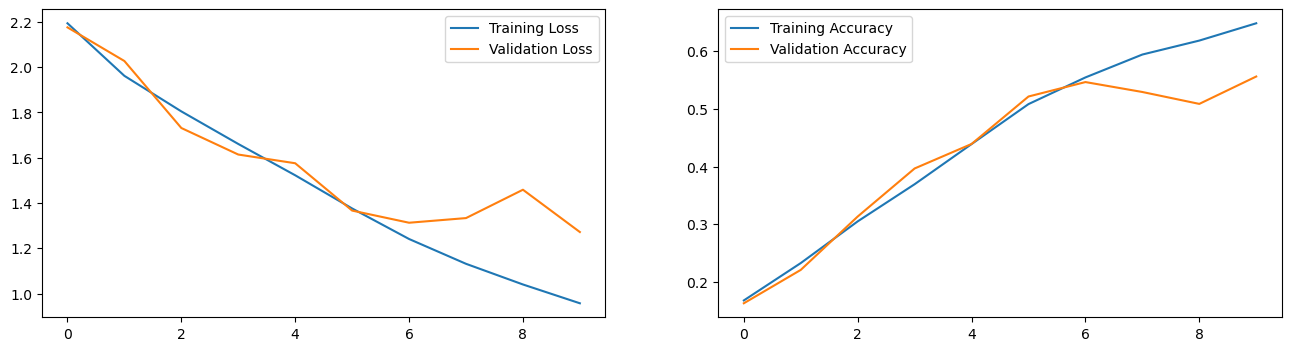

In [98]:
plot_history(history4)

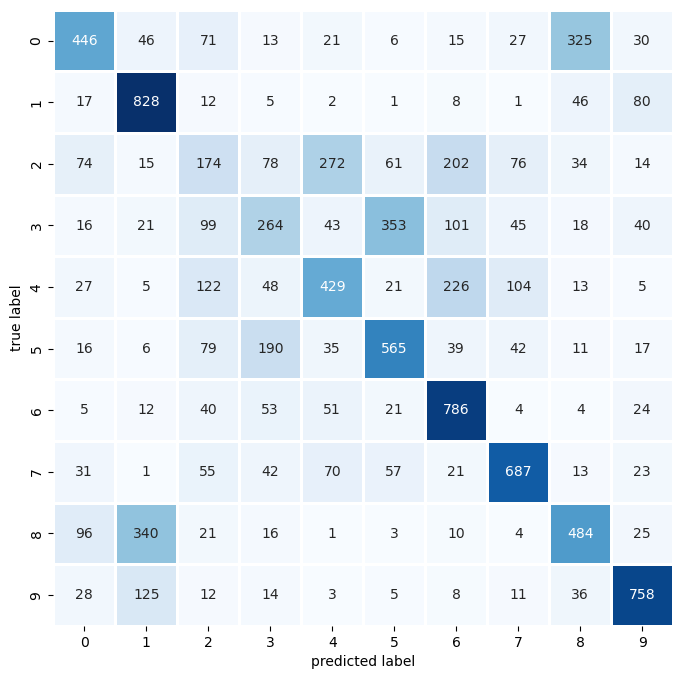

In [99]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred4)

Model 5-Model 1 with Regularization

In [136]:
model5 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    Dropout(0.3),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [137]:
model5.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
model5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_35 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                     

In [139]:
start_time = time.time()
history5 = model5.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_5 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_5}s')

Epoch 1/10
1407/1407 [==============================] - 25s 17ms/step - loss: 2.1123 - accuracy: 0.2462 - val_loss: 1.8373 - val_accuracy: 0.3432
Epoch 2/10
1407/1407 [==============================] - 23s 17ms/step - loss: 1.8545 - accuracy: 0.3252 - val_loss: 1.7798 - val_accuracy: 0.3688
Epoch 3/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7893 - accuracy: 0.3554 - val_loss: 1.6922 - val_accuracy: 0.3974
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7429 - accuracy: 0.3741 - val_loss: 1.6369 - val_accuracy: 0.4118
Epoch 5/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7140 - accuracy: 0.3870 - val_loss: 1.6115 - val_accuracy: 0.4308
Epoch 6/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6932 - accuracy: 0.3964 - val_loss: 1.5994 - val_accuracy: 0.4390
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6740 - accuracy: 0.4017 - val_loss: 1.5948 -

In [140]:
test_loss5, test_acc5 = model5.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc5}, Test loss: {test_loss5}")

313/313 - 2s - loss: 1.5669 - accuracy: 0.4431 - 2s/epoch - 6ms/step
Test accuracy: 0.4431000053882599, Test loss: 1.5669196844100952


In [141]:
pred5= model5.predict(test_images)
pred5=np.argmax(pred5, axis=1)

313/313 [==============================] - 2s 5ms/step


In [142]:
print_validation_report(np.argmax(test_labels, axis=1), pred5)

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      1000
           1       0.39      0.70      0.50      1000
           2       0.39      0.14      0.20      1000
           3       0.37      0.23      0.29      1000
           4       0.37      0.48      0.42      1000
           5       0.38      0.37      0.38      1000
           6       0.52      0.44      0.48      1000
           7       0.53      0.47      0.50      1000
           8       0.48      0.69      0.57      1000
           9       0.47      0.49      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000

Accuracy Score: 0.4431
Root Mean Square Error: 3.375322206841889


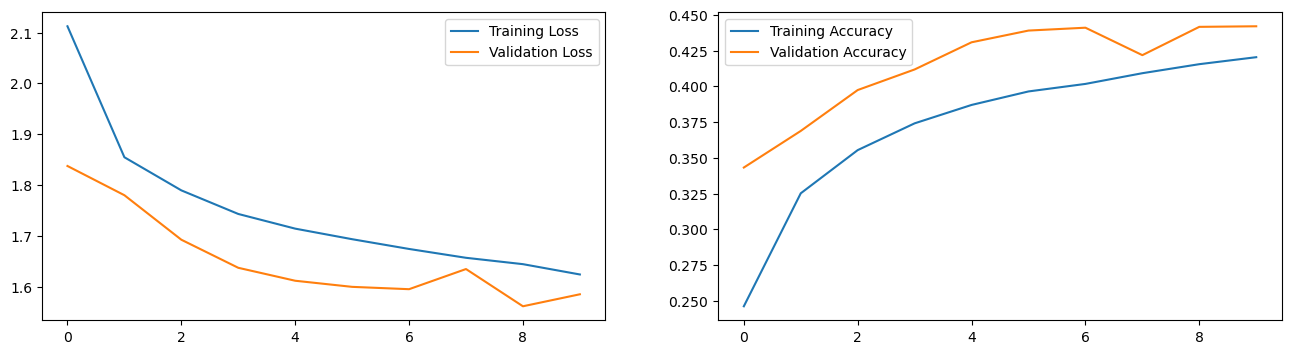

In [143]:
plot_history(history5)

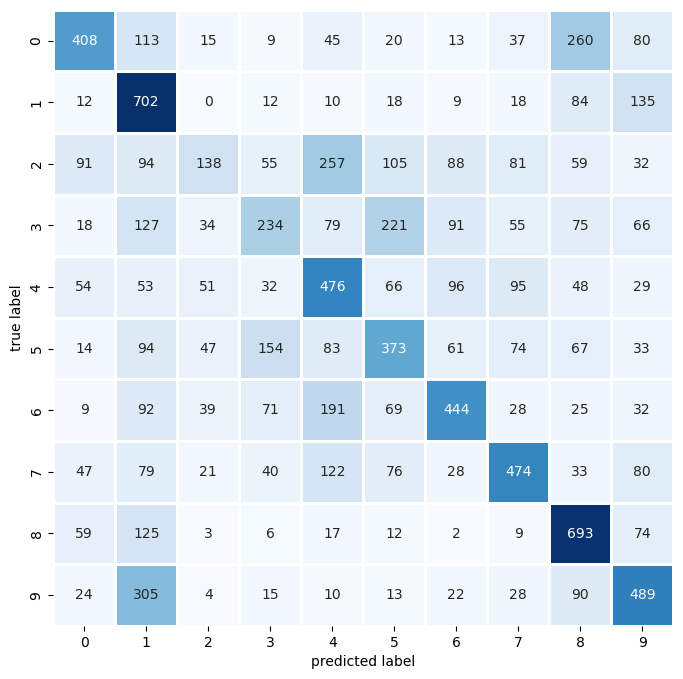

In [144]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred5)

Model 6

In [145]:
model6 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    Dropout(0.3),
    layers.Dense(256, activation='relu'),
    Dropout(0.3),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [146]:
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
model6.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Bat  (None, 128)             

In [148]:
start_time = time.time()
history6 = model6.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_6 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_6}s')

Epoch 1/10
1407/1407 [==============================] - 25s 16ms/step - loss: 2.1709 - accuracy: 0.2222 - val_loss: 1.8387 - val_accuracy: 0.3298
Epoch 2/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.8758 - accuracy: 0.3178 - val_loss: 1.8095 - val_accuracy: 0.3388
Epoch 3/10
1407/1407 [==============================] - 25s 17ms/step - loss: 1.8092 - accuracy: 0.3519 - val_loss: 1.7708 - val_accuracy: 0.3820
Epoch 4/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7626 - accuracy: 0.3672 - val_loss: 1.6689 - val_accuracy: 0.3996
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7265 - accuracy: 0.3812 - val_loss: 1.6686 - val_accuracy: 0.3916
Epoch 6/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.7131 - accuracy: 0.3869 - val_loss: 1.6747 - val_accuracy: 0.4068
Epoch 7/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6875 - accuracy: 0.3979 - val_loss: 1.5999 -

In [149]:
test_loss6, test_acc6 = model6.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc6}, Test loss: {test_loss6}")

313/313 - 2s - loss: 1.5324 - accuracy: 0.4609 - 2s/epoch - 6ms/step
Test accuracy: 0.4609000086784363, Test loss: 1.5323693752288818


In [150]:
pred6= model6.predict(test_images)
pred6=np.argmax(pred6, axis=1)

313/313 [==============================] - 2s 6ms/step


In [151]:
print_validation_report(np.argmax(test_labels, axis=1), pred6)

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.49      0.51      1000
           1       0.57      0.54      0.55      1000
           2       0.32      0.30      0.31      1000
           3       0.31      0.31      0.31      1000
           4       0.41      0.33      0.37      1000
           5       0.45      0.33      0.38      1000
           6       0.44      0.61      0.51      1000
           7       0.47      0.60      0.53      1000
           8       0.60      0.56      0.58      1000
           9       0.51      0.53      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

Accuracy Score: 0.4609
Root Mean Square Error: 3.2052301009443926


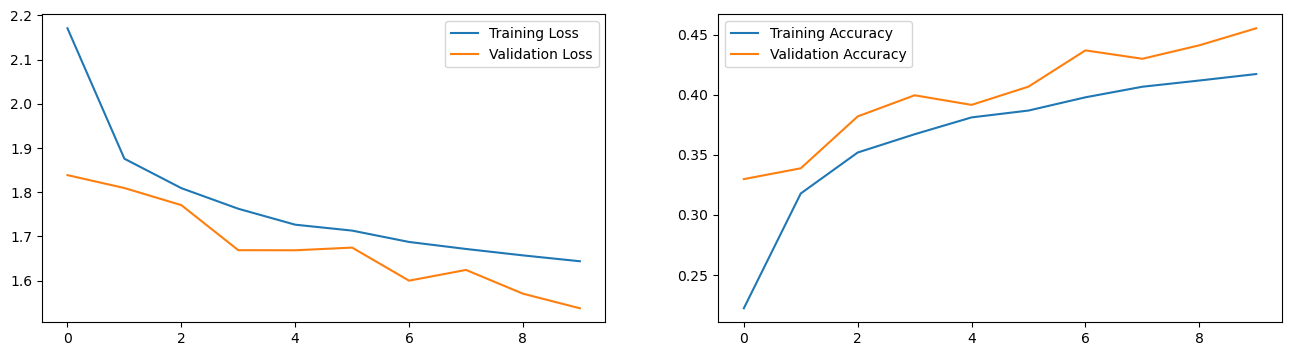

In [152]:
plot_history(history6)

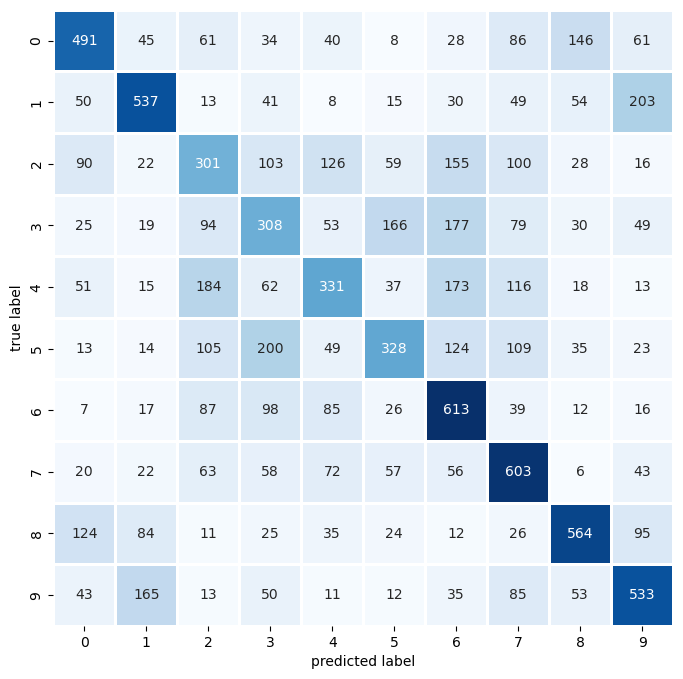

In [153]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred6)

Model 7

In [154]:
model7 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [155]:
model7.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
model7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 15, 15, 128)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 6, 6, 256)       

In [157]:
start_time = time.time()
history7 = model7.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_7 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_7}s')

Epoch 1/10
1407/1407 [==============================] - 178s 125ms/step - loss: 1.5167 - accuracy: 0.4573 - val_loss: 1.5043 - val_accuracy: 0.4936
Epoch 2/10
1407/1407 [==============================] - 184s 131ms/step - loss: 1.1767 - accuracy: 0.5917 - val_loss: 1.5923 - val_accuracy: 0.4690
Epoch 3/10
1407/1407 [==============================] - 189s 134ms/step - loss: 1.0648 - accuracy: 0.6339 - val_loss: 1.0035 - val_accuracy: 0.6488
Epoch 4/10
1407/1407 [==============================] - 205s 145ms/step - loss: 0.9892 - accuracy: 0.6618 - val_loss: 1.2594 - val_accuracy: 0.5900
Epoch 5/10
1407/1407 [==============================] - 176s 125ms/step - loss: 0.9467 - accuracy: 0.6791 - val_loss: 0.9023 - val_accuracy: 0.6930
Epoch 6/10
1407/1407 [==============================] - 159s 113ms/step - loss: 0.9055 - accuracy: 0.6951 - val_loss: 0.8799 - val_accuracy: 0.7058
Epoch 7/10
1407/1407 [==============================] - 158s 112ms/step - loss: 0.8758 - accuracy: 0.7043 - val_

In [158]:
test_loss7, test_acc7 = model7.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc7}, Test loss: {test_loss7}")

313/313 - 11s - loss: 1.2567 - accuracy: 0.5988 - 11s/epoch - 35ms/step
Test accuracy: 0.598800003528595, Test loss: 1.2567203044891357


In [159]:
pred7= model7.predict(test_images)
pred7=np.argmax(pred7, axis=1)

313/313 [==============================] - 11s 35ms/step


In [160]:
print_validation_report(np.argmax(test_labels, axis=1), pred7)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.29      0.44      1000
           1       0.97      0.54      0.69      1000
           2       0.47      0.57      0.52      1000
           3       0.54      0.43      0.48      1000
           4       0.40      0.73      0.52      1000
           5       0.66      0.45      0.53      1000
           6       0.47      0.91      0.62      1000
           7       0.81      0.65      0.72      1000
           8       0.79      0.66      0.72      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.60     10000
   macro avg       0.67      0.60      0.60     10000
weighted avg       0.67      0.60      0.60     10000

Accuracy Score: 0.5988
Root Mean Square Error: 2.4592681838303037


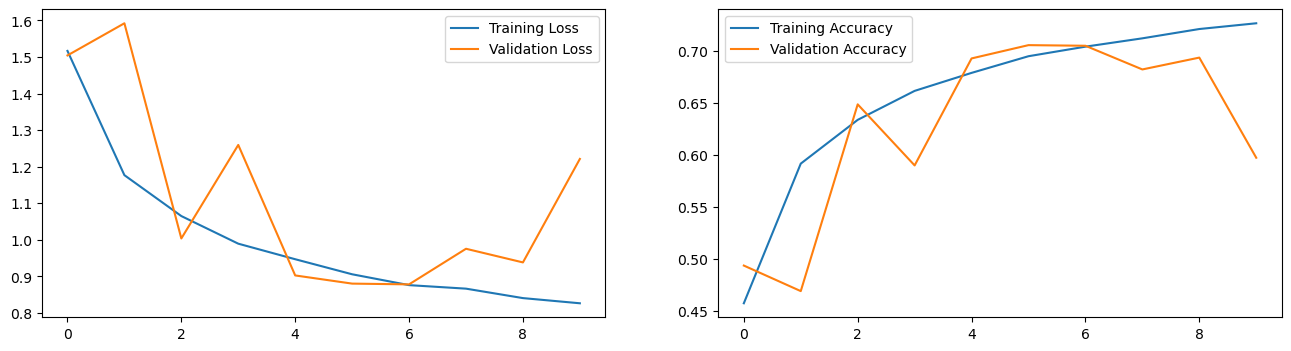

In [161]:
plot_history(history7)

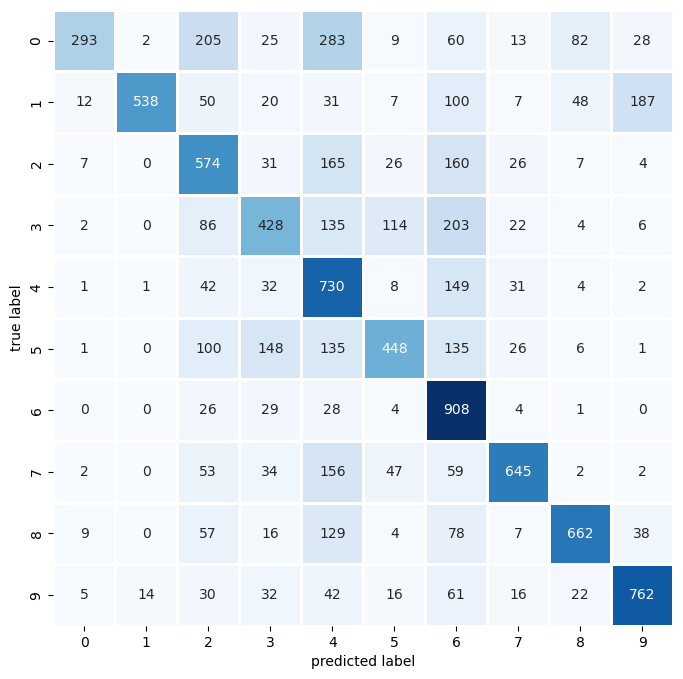

In [162]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred7)

Model 8

In [127]:
model8 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(512, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [128]:
model8.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
model8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 128)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 6, 6, 256)       

In [130]:
start_time = time.time()
history8 = model8.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_8 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_8}s')

Epoch 1/10
1407/1407 [==============================] - 260s 183ms/step - loss: 1.6019 - accuracy: 0.4155 - val_loss: 1.5849 - val_accuracy: 0.4218
Epoch 2/10
1407/1407 [==============================] - 221s 157ms/step - loss: 1.1973 - accuracy: 0.5811 - val_loss: 1.0165 - val_accuracy: 0.6438
Epoch 3/10
1407/1407 [==============================] - 211s 150ms/step - loss: 1.0471 - accuracy: 0.6393 - val_loss: 1.0746 - val_accuracy: 0.6160
Epoch 4/10
1407/1407 [==============================] - 222s 158ms/step - loss: 0.9679 - accuracy: 0.6700 - val_loss: 0.8997 - val_accuracy: 0.6900
Epoch 5/10
1407/1407 [==============================] - 246s 175ms/step - loss: 0.9172 - accuracy: 0.6901 - val_loss: 0.9030 - val_accuracy: 0.6924
Epoch 6/10
1407/1407 [==============================] - 240s 171ms/step - loss: 0.8768 - accuracy: 0.7069 - val_loss: 0.7769 - val_accuracy: 0.7352
Epoch 7/10
1407/1407 [==============================] - 259s 184ms/step - loss: 0.8545 - accuracy: 0.7165 - val_

In [131]:
test_loss8, test_acc8 = model8.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc8}, Test loss: {test_loss8}")

313/313 - 14s - loss: 0.8518 - accuracy: 0.7308 - 14s/epoch - 45ms/step
Test accuracy: 0.7307999730110168, Test loss: 0.8517852425575256


In [132]:
pred8= model8.predict(test_images)
pred8=np.argmax(pred8, axis=1)

313/313 [==============================] - 15s 47ms/step


In [133]:
print_validation_report(np.argmax(test_labels, axis=1), pred8)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1000
           1       0.80      0.93      0.86      1000
           2       0.74      0.48      0.58      1000
           3       0.64      0.50      0.56      1000
           4       0.67      0.70      0.68      1000
           5       0.77      0.55      0.64      1000
           6       0.59      0.93      0.73      1000
           7       0.64      0.88      0.74      1000
           8       0.88      0.81      0.84      1000
           9       0.86      0.81      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Accuracy Score: 0.7308
Root Mean Square Error: 2.069081922012756


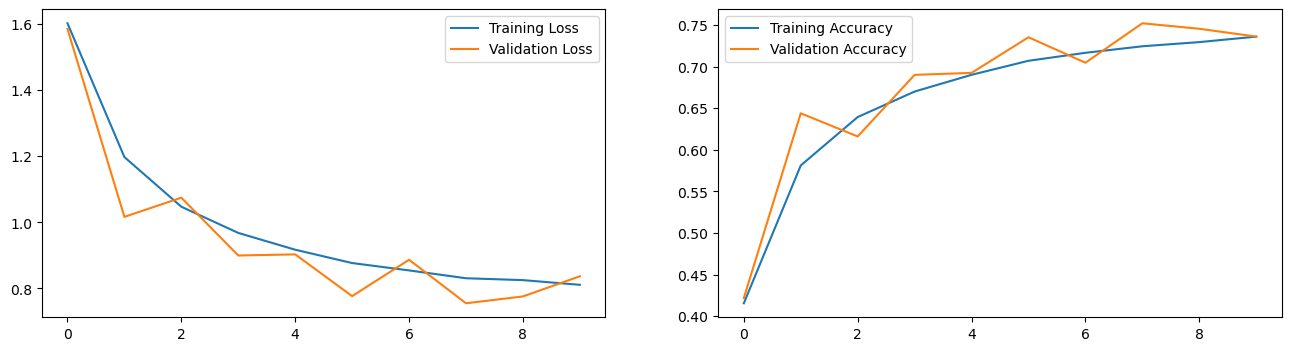

In [134]:
plot_history(history8)

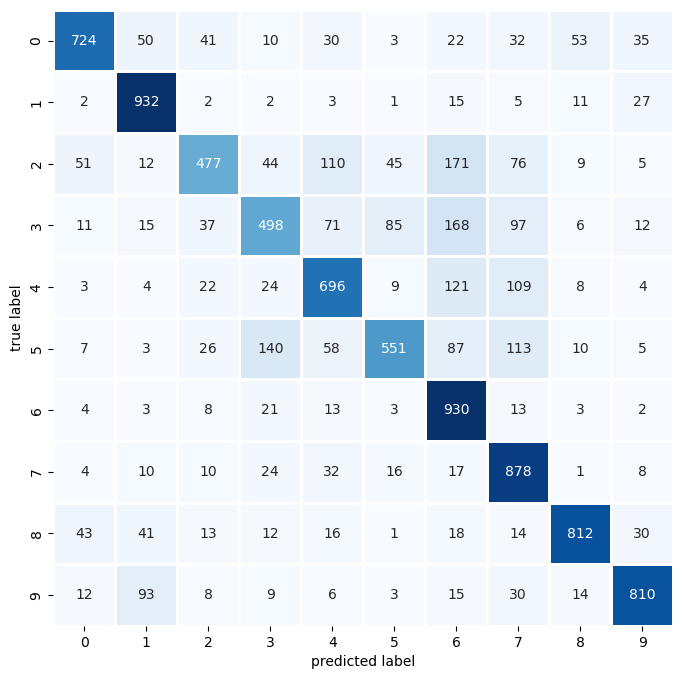

In [135]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred8)

Model 9

In [302]:
model9 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(512, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [303]:
model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [304]:
model9.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_93 (Dropout)        (None, 15, 15, 128)       0         
                                                                 
 conv2d_74 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_72 (MaxPooli  (None, 6, 6, 256)         0         
 ng2D)                                                           
                                                                 
 dropout_94 (Dropout)        (None, 6, 6, 256)       

In [305]:
start_time = time.time()
history9 = model9.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_9 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_9}s')

Epoch 1/10
1407/1407 [==============================] - 289s 202ms/step - loss: 1.5497 - accuracy: 0.4382 - val_loss: 1.2353 - val_accuracy: 0.5598
Epoch 2/10
1407/1407 [==============================] - 274s 195ms/step - loss: 1.1941 - accuracy: 0.5771 - val_loss: 1.1296 - val_accuracy: 0.6112
Epoch 3/10
1407/1407 [==============================] - 279s 198ms/step - loss: 1.0550 - accuracy: 0.6334 - val_loss: 1.0491 - val_accuracy: 0.6332
Epoch 4/10
1407/1407 [==============================] - 279s 198ms/step - loss: 0.9644 - accuracy: 0.6633 - val_loss: 0.8714 - val_accuracy: 0.7022
Epoch 5/10
1407/1407 [==============================] - 279s 198ms/step - loss: 0.9020 - accuracy: 0.6885 - val_loss: 0.8896 - val_accuracy: 0.6982
Epoch 6/10
1407/1407 [==============================] - 296s 210ms/step - loss: 0.8625 - accuracy: 0.7035 - val_loss: 0.7519 - val_accuracy: 0.7446
Epoch 7/10
1407/1407 [==============================] - 199s 141ms/step - loss: 0.8219 - accuracy: 0.7161 - val_

In [306]:
test_loss9, test_acc9 = model9.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc9}, Test loss: {test_loss9}")

313/313 - 14s - loss: 0.8138 - accuracy: 0.7206 - 14s/epoch - 46ms/step
Test accuracy: 0.7206000089645386, Test loss: 0.8138440847396851


In [307]:
pred9= model9.predict(test_images)
pred9=np.argmax(pred9, axis=1)

313/313 [==============================] - 14s 45ms/step


In [308]:
print_validation_report(np.argmax(test_labels, axis=1), pred9)

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1000
           1       0.78      0.93      0.84      1000
           2       0.56      0.66      0.61      1000
           3       0.56      0.52      0.54      1000
           4       0.73      0.61      0.67      1000
           5       0.68      0.60      0.64      1000
           6       0.85      0.70      0.77      1000
           7       0.84      0.74      0.79      1000
           8       0.74      0.89      0.81      1000
           9       0.89      0.72      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

Accuracy Score: 0.7206
Root Mean Square Error: 2.2296860765587607


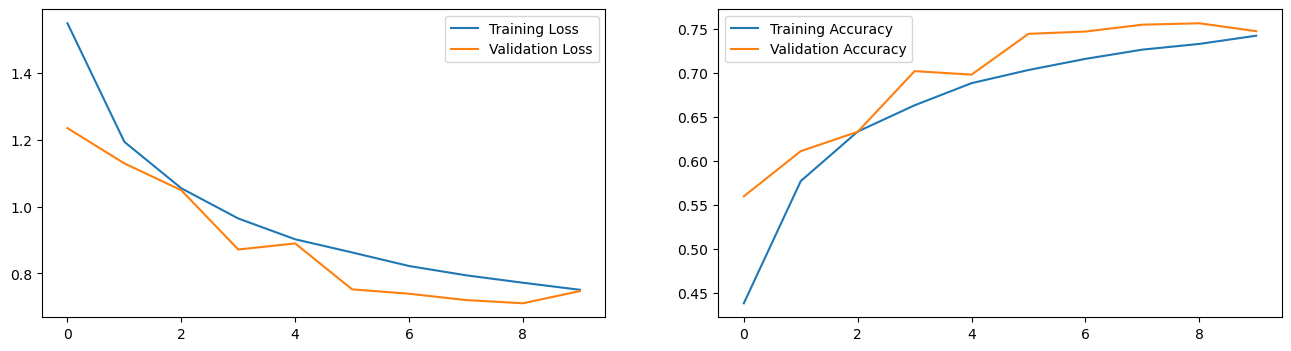

In [309]:
plot_history(history9)

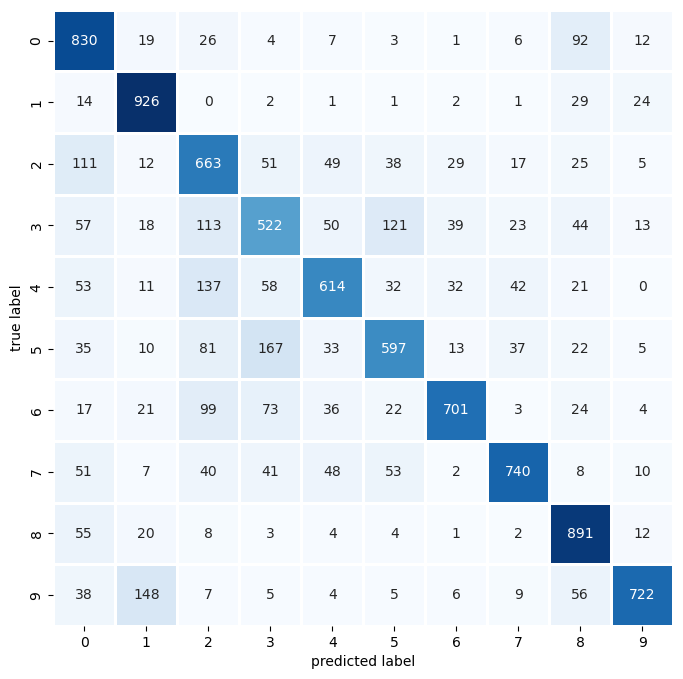

In [310]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred9)

Model 10

In [249]:
model10 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(64, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [250]:
model10.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [251]:
start_time = time.time()
history10 = model10.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_10 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_10}s')

Epoch 1/10
1407/1407 [==============================] - 53s 35ms/step - loss: 1.6728 - accuracy: 0.3838 - val_loss: 1.5077 - val_accuracy: 0.4568
Epoch 2/10
1407/1407 [==============================] - 41s 29ms/step - loss: 1.3673 - accuracy: 0.5093 - val_loss: 1.4582 - val_accuracy: 0.4774
Epoch 3/10
1407/1407 [==============================] - 46s 33ms/step - loss: 1.2518 - accuracy: 0.5581 - val_loss: 1.1201 - val_accuracy: 0.5906
Epoch 4/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.1750 - accuracy: 0.5869 - val_loss: 1.0300 - val_accuracy: 0.6344
Epoch 5/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.1272 - accuracy: 0.6048 - val_loss: 1.1754 - val_accuracy: 0.5812
Epoch 6/10
1407/1407 [==============================] - 46s 33ms/step - loss: 1.0890 - accuracy: 0.6209 - val_loss: 1.2701 - val_accuracy: 0.5778
Epoch 7/10
1407/1407 [==============================] - 45s 32ms/step - loss: 1.0549 - accuracy: 0.6363 - val_loss: 0.8600 -

In [252]:
test_loss10, test_acc10 = model10.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc10}, Test loss: {test_loss10}")

313/313 - 3s - loss: 1.1309 - accuracy: 0.6233 - 3s/epoch - 11ms/step
Test accuracy: 0.6233000159263611, Test loss: 1.1308664083480835


In [253]:
pred10= model10.predict(test_images)
pred10=np.argmax(pred10, axis=1)

313/313 [==============================] - 4s 13ms/step


In [254]:
print_validation_report(np.argmax(test_labels, axis=1), pred10)

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1000
           1       0.64      0.93      0.76      1000
           2       0.80      0.32      0.45      1000
           3       0.56      0.31      0.40      1000
           4       0.65      0.52      0.57      1000
           5       0.75      0.41      0.53      1000
           6       0.46      0.90      0.61      1000
           7       0.82      0.59      0.69      1000
           8       0.64      0.86      0.74      1000
           9       0.57      0.79      0.66      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.61     10000
weighted avg       0.66      0.62      0.61     10000

Accuracy Score: 0.6233
Root Mean Square Error: 2.679440240050149


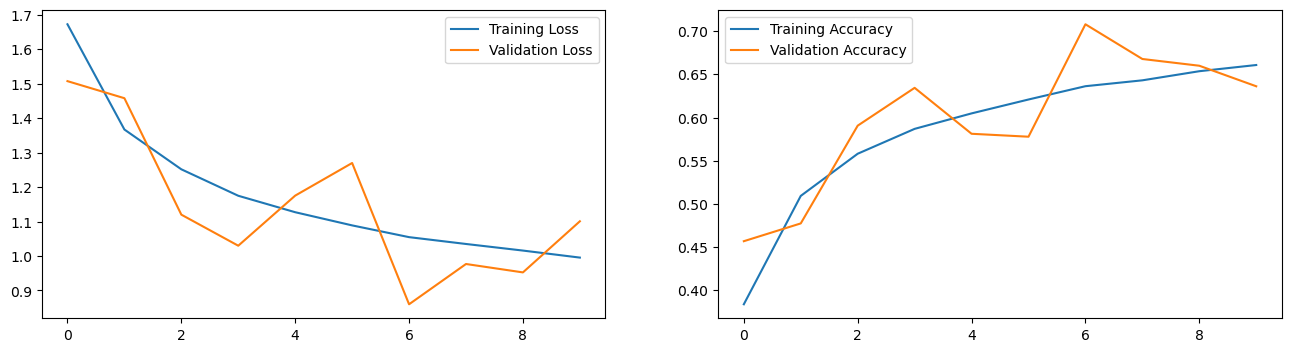

In [255]:
plot_history(history10)

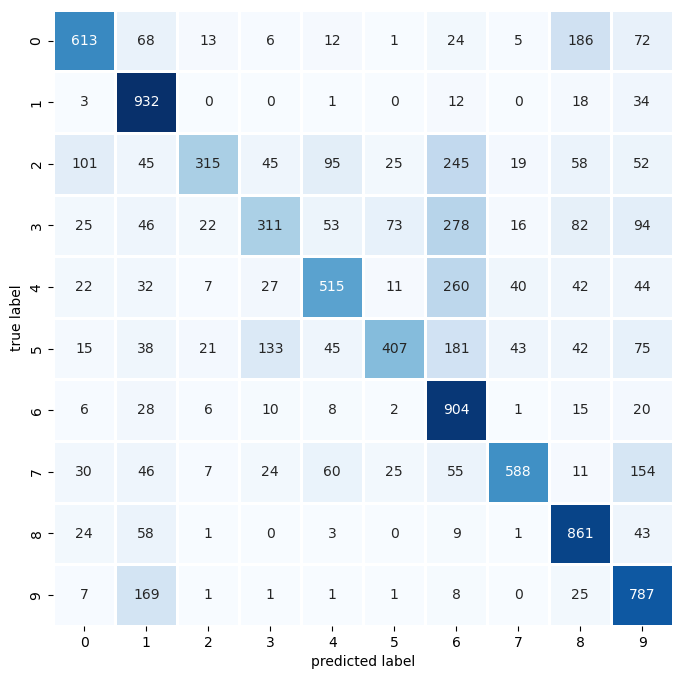

In [256]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred10)

Model 11

In [263]:
model11 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(64, (3, 3), (1, 1), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(128, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [264]:
model11.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [265]:
start_time = time.time()
history11 = model11.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_11 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_11}s')

Epoch 1/10
1407/1407 [==============================] - 105s 73ms/step - loss: 1.5851 - accuracy: 0.4226 - val_loss: 1.6835 - val_accuracy: 0.4222
Epoch 2/10
1407/1407 [==============================] - 96s 68ms/step - loss: 1.2418 - accuracy: 0.5619 - val_loss: 1.0996 - val_accuracy: 0.6074
Epoch 3/10
1407/1407 [==============================] - 95s 67ms/step - loss: 1.1080 - accuracy: 0.6146 - val_loss: 1.1051 - val_accuracy: 0.6094
Epoch 4/10
1407/1407 [==============================] - 94s 67ms/step - loss: 1.0320 - accuracy: 0.6443 - val_loss: 0.9509 - val_accuracy: 0.6678
Epoch 5/10
1407/1407 [==============================] - 92s 65ms/step - loss: 0.9768 - accuracy: 0.6639 - val_loss: 1.0226 - val_accuracy: 0.6584
Epoch 6/10
1407/1407 [==============================] - 95s 67ms/step - loss: 0.9399 - accuracy: 0.6761 - val_loss: 0.8949 - val_accuracy: 0.6908
Epoch 7/10
1407/1407 [==============================] - 97s 69ms/step - loss: 0.9116 - accuracy: 0.6878 - val_loss: 0.8956 

In [266]:
test_loss11, test_acc11 = model11.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc11}, Test loss: {test_loss11}")

313/313 - 7s - loss: 0.7762 - accuracy: 0.7349 - 7s/epoch - 24ms/step
Test accuracy: 0.7348999977111816, Test loss: 0.776176393032074


In [267]:
pred11= model11.predict(test_images)
pred11=np.argmax(pred11, axis=1)

313/313 [==============================] - 8s 26ms/step


In [268]:
print_validation_report(np.argmax(test_labels, axis=1), pred11)

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1000
           1       0.82      0.90      0.86      1000
           2       0.66      0.56      0.61      1000
           3       0.66      0.43      0.52      1000
           4       0.63      0.77      0.69      1000
           5       0.69      0.62      0.66      1000
           6       0.75      0.82      0.78      1000
           7       0.83      0.74      0.79      1000
           8       0.81      0.84      0.83      1000
           9       0.79      0.82      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Accuracy Score: 0.7349
Root Mean Square Error: 2.1120132575341475


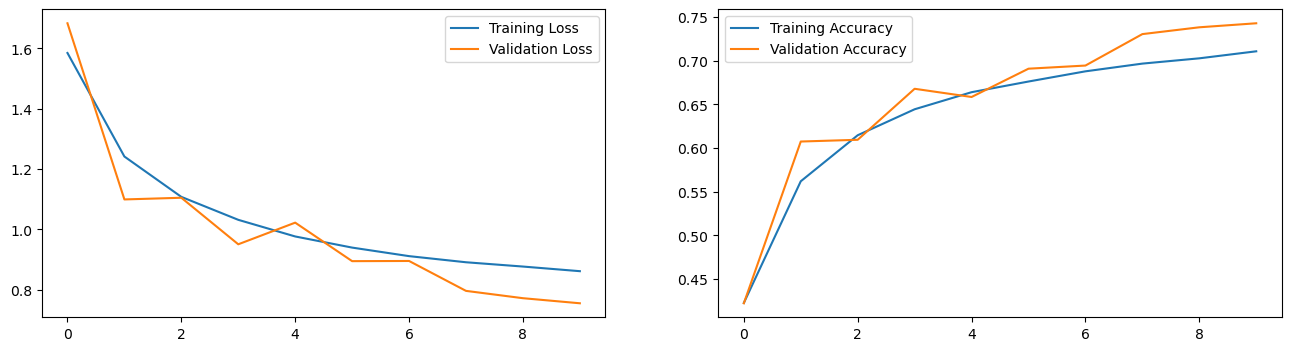

In [269]:
plot_history(history11)

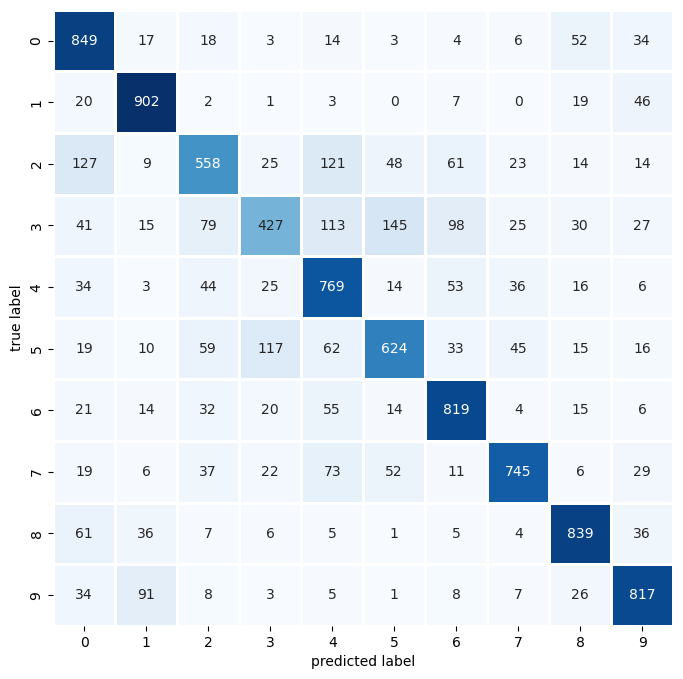

In [270]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred11)

Model 12

In [230]:
model12 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='swish', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='swish'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(512, (3, 3), (1, 1), activation='swish'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [231]:
model12.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [232]:
start_time = time.time()
history12 = model12.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_12 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_12}s')

Epoch 1/10
1407/1407 [==============================] - 219s 153ms/step - loss: 1.6441 - accuracy: 0.4034 - val_loss: 1.8600 - val_accuracy: 0.4226
Epoch 2/10
1407/1407 [==============================] - 264s 188ms/step - loss: 1.2627 - accuracy: 0.5608 - val_loss: 1.4021 - val_accuracy: 0.5416
Epoch 3/10
1407/1407 [==============================] - 1721s 1s/step - loss: 1.1169 - accuracy: 0.6170 - val_loss: 1.7446 - val_accuracy: 0.5338
Epoch 4/10
1407/1407 [==============================] - 281s 200ms/step - loss: 1.0290 - accuracy: 0.6512 - val_loss: 1.4000 - val_accuracy: 0.6040
Epoch 5/10
1407/1407 [==============================] - 280s 199ms/step - loss: 0.9701 - accuracy: 0.6763 - val_loss: 1.2899 - val_accuracy: 0.6220
Epoch 6/10
1407/1407 [==============================] - 288s 205ms/step - loss: 0.9394 - accuracy: 0.6891 - val_loss: 1.6784 - val_accuracy: 0.5748
Epoch 7/10
1407/1407 [==============================] - 287s 204ms/step - loss: 0.9188 - accuracy: 0.6990 - val_lo

In [233]:
test_loss12, test_acc12 = model12.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc12}, Test loss: {test_loss12}")

313/313 - 21s - loss: 1.5472 - accuracy: 0.6751 - 21s/epoch - 67ms/step
Test accuracy: 0.6751000285148621, Test loss: 1.547225832939148


In [234]:
pred12= model12.predict(test_images)
pred12=np.argmax(pred12, axis=1)

313/313 [==============================] - 22s 69ms/step


In [235]:
print_validation_report(np.argmax(test_labels, axis=1), pred12)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1000
           1       0.84      0.82      0.83      1000
           2       0.55      0.61      0.58      1000
           3       0.57      0.38      0.45      1000
           4       0.66      0.64      0.65      1000
           5       0.73      0.49      0.58      1000
           6       0.49      0.92      0.64      1000
           7       0.91      0.61      0.73      1000
           8       0.74      0.85      0.79      1000
           9       0.72      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.70      0.68      0.67     10000

Accuracy Score: 0.6751
Root Mean Square Error: 2.3469341703592796


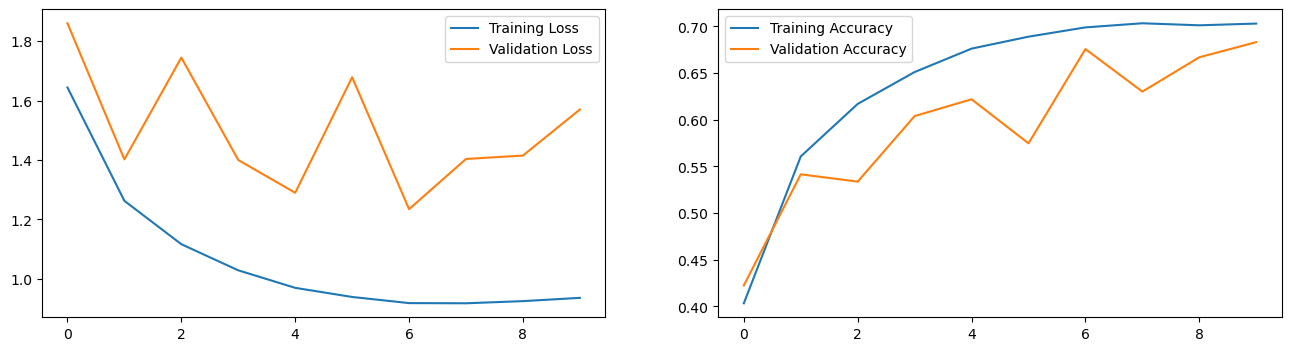

In [236]:
plot_history(history12)

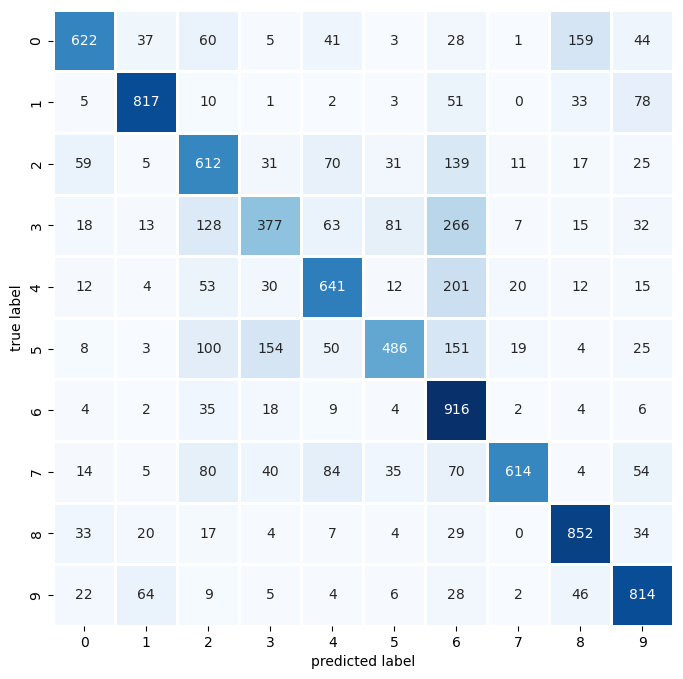

In [237]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred12)

Model 13

In [241]:
model13 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), (1, 1), activation='LeakyReLU', input_shape=train_images.shape[1:]),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Second convolutional layer
    layers.Conv2D(256, (3, 3), (1, 1), activation='LeakyReLU'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Third convolutional layer
    layers.Conv2D(512, (3, 3), (1, 1), activation='LeakyReLU'),
    layers.MaxPooling2D((2, 2),strides=2),
    Dropout(0.3),
    # Flatten layer to prepare for fully connected layers
    layers.Flatten(),
    # Dense fully connected layers
    layers.Dense(384, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [242]:
model13.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [243]:
start_time = time.time()
history13 = model13.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_13 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_13}s')

Epoch 1/10
1407/1407 [==============================] - 1355s 957ms/step - loss: 1.5744 - accuracy: 0.4360 - val_loss: 1.2134 - val_accuracy: 0.5722
Epoch 2/10
1407/1407 [==============================] - 268s 191ms/step - loss: 1.2307 - accuracy: 0.5734 - val_loss: 5.4803 - val_accuracy: 0.2562
Epoch 3/10
1407/1407 [==============================] - 267s 190ms/step - loss: 1.1159 - accuracy: 0.6218 - val_loss: 1.1036 - val_accuracy: 0.6332
Epoch 4/10
1407/1407 [==============================] - 271s 192ms/step - loss: 1.0722 - accuracy: 0.6407 - val_loss: 1.0696 - val_accuracy: 0.6396
Epoch 5/10
1407/1407 [==============================] - 267s 190ms/step - loss: 1.0457 - accuracy: 0.6505 - val_loss: 1.7332 - val_accuracy: 0.4770
Epoch 6/10
1407/1407 [==============================] - 267s 190ms/step - loss: 1.0416 - accuracy: 0.6581 - val_loss: 1.5391 - val_accuracy: 0.5864
Epoch 7/10
1407/1407 [==============================] - 380s 270ms/step - loss: 1.0570 - accuracy: 0.6572 - val

In [244]:
test_loss13, test_acc13 = model13.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc13}, Test loss: {test_loss13}")

313/313 - 19s - loss: 1.2202 - accuracy: 0.6553 - 19s/epoch - 60ms/step
Test accuracy: 0.6553000211715698, Test loss: 1.2202481031417847


In [245]:
pred13= model13.predict(test_images)
pred13=np.argmax(pred13, axis=1)

313/313 [==============================] - 21s 65ms/step


In [246]:
print_validation_report(np.argmax(test_labels, axis=1), pred13)

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1000
           1       0.74      0.85      0.79      1000
           2       0.70      0.44      0.54      1000
           3       0.61      0.20      0.30      1000
           4       0.68      0.61      0.64      1000
           5       0.57      0.63      0.60      1000
           6       0.60      0.87      0.71      1000
           7       0.84      0.61      0.70      1000
           8       0.62      0.88      0.72      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.64     10000
weighted avg       0.66      0.66      0.64     10000

Accuracy Score: 0.6553
Root Mean Square Error: 2.560039062201981


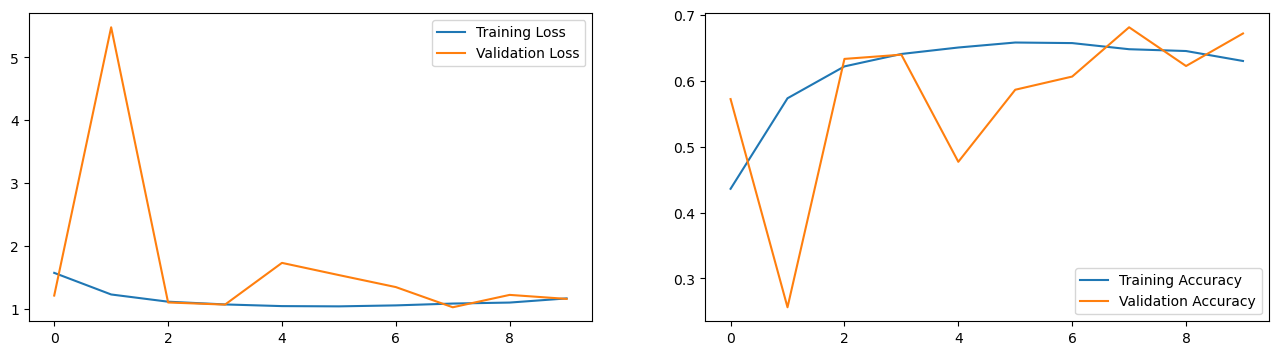

In [247]:
plot_history(history13)

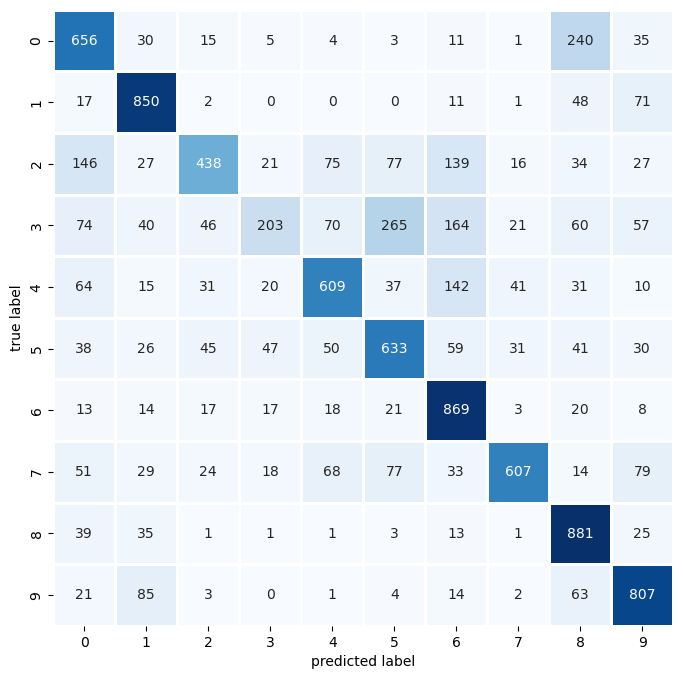

In [248]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred13)

Model 14

In [271]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pre-trained ResNet50 model (without top classification layer)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification head
model14 = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

94765736/94765736 [==============================] - 21s 0us/step


In [272]:
model14.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [273]:
start_time = time.time()
history14 = model14.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_14 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_14}s')

Epoch 1/10
1407/1407 [==============================] - 704s 494ms/step - loss: 2.1508 - accuracy: 0.2165 - val_loss: 2.2711 - val_accuracy: 0.1474
Epoch 2/10
1407/1407 [==============================] - 214s 152ms/step - loss: 1.9405 - accuracy: 0.2886 - val_loss: 2.0058 - val_accuracy: 0.2756
Epoch 3/10
1407/1407 [==============================] - 225s 160ms/step - loss: 1.8854 - accuracy: 0.3154 - val_loss: 1.9751 - val_accuracy: 0.2722
Epoch 4/10
1407/1407 [==============================] - 225s 160ms/step - loss: 1.8510 - accuracy: 0.3305 - val_loss: 1.9093 - val_accuracy: 0.3026
Epoch 5/10
1407/1407 [==============================] - 219s 156ms/step - loss: 1.8260 - accuracy: 0.3409 - val_loss: 1.9323 - val_accuracy: 0.3230
Epoch 6/10
1407/1407 [==============================] - 225s 160ms/step - loss: 1.8078 - accuracy: 0.3462 - val_loss: 2.3658 - val_accuracy: 0.2066
Epoch 7/10
1407/1407 [==============================] - 248s 176ms/step - loss: 1.7945 - accuracy: 0.3545 - val_

In [274]:
test_loss14, test_acc14 = model14.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc14}, Test loss: {test_loss14}")

313/313 - 42s - loss: 1.7518 - accuracy: 0.3622 - 42s/epoch - 134ms/step
Test accuracy: 0.362199991941452, Test loss: 1.7518292665481567


In [275]:
pred14= model14.predict(test_images)
pred14=np.argmax(pred14, axis=1)

313/313 [==============================] - 44s 134ms/step


In [276]:
print_validation_report(np.argmax(test_labels, axis=1), pred14)

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.24      0.33      1000
           1       0.27      0.80      0.40      1000
           2       0.30      0.22      0.25      1000
           3       0.34      0.03      0.05      1000
           4       0.29      0.58      0.39      1000
           5       0.39      0.35      0.37      1000
           6       0.46      0.23      0.31      1000
           7       0.47      0.46      0.46      1000
           8       0.47      0.52      0.50      1000
           9       0.60      0.19      0.29      1000

    accuracy                           0.36     10000
   macro avg       0.41      0.36      0.34     10000
weighted avg       0.41      0.36      0.34     10000

Accuracy Score: 0.3622
Root Mean Square Error: 3.5954832776693593


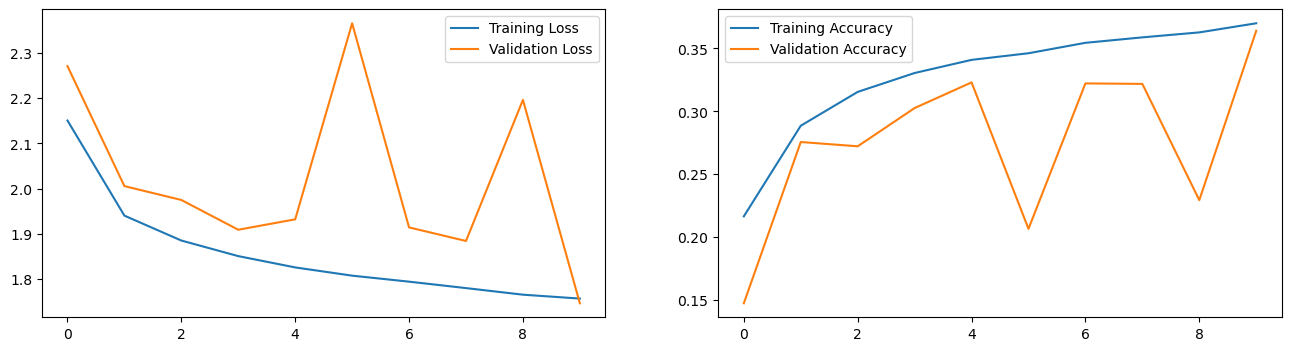

In [277]:
plot_history(history14)

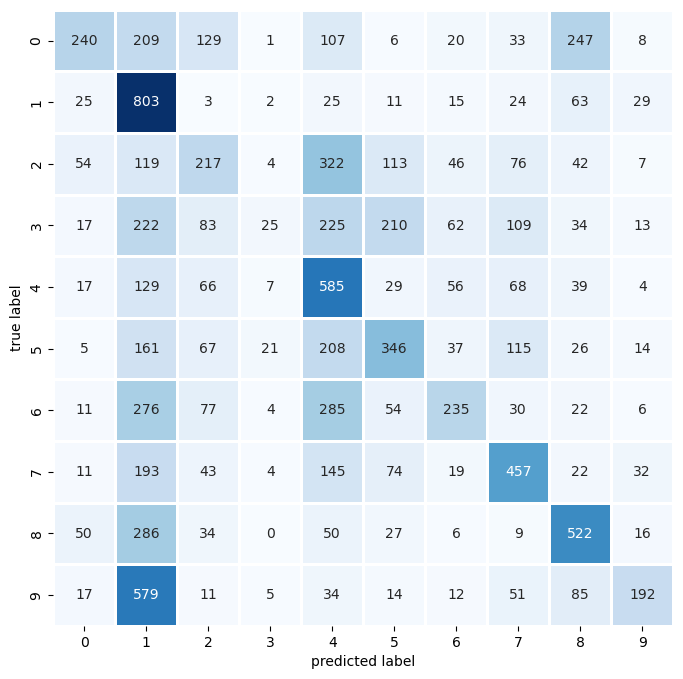

In [278]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred14)

Model 15

In [279]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pre-trained VGG16 model (without top classification layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
model15 = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

58889256/58889256 [==============================] - 6s 0us/step


In [280]:
model15.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [281]:
start_time = time.time()
history15 = model15.fit(train_images, np.argmax(train_labels, axis=1), epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_15 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_15}s')

Epoch 1/10
1407/1407 [==============================] - 301s 213ms/step - loss: 1.3563 - accuracy: 0.5218 - val_loss: 1.2186 - val_accuracy: 0.5690
Epoch 2/10
1407/1407 [==============================] - 325s 231ms/step - loss: 1.1715 - accuracy: 0.5896 - val_loss: 1.1891 - val_accuracy: 0.5790
Epoch 3/10
1407/1407 [==============================] - 1361s 968ms/step - loss: 1.1002 - accuracy: 0.6168 - val_loss: 1.1547 - val_accuracy: 0.5994
Epoch 4/10
1407/1407 [==============================] - 311s 221ms/step - loss: 1.0503 - accuracy: 0.6358 - val_loss: 1.1332 - val_accuracy: 0.6132
Epoch 5/10
1407/1407 [==============================] - 333s 237ms/step - loss: 1.0073 - accuracy: 0.6495 - val_loss: 1.1150 - val_accuracy: 0.6180
Epoch 6/10
1407/1407 [==============================] - 348s 247ms/step - loss: 0.9678 - accuracy: 0.6638 - val_loss: 1.1403 - val_accuracy: 0.6202
Epoch 7/10
1407/1407 [==============================] - 332s 236ms/step - loss: 0.9327 - accuracy: 0.6773 - val

In [282]:
test_loss15, test_acc15 = model15.evaluate(test_images, np.argmax(test_labels, axis=1), verbose=2)
print(f"Test accuracy: {test_acc15}, Test loss: {test_loss15}")

313/313 - 60s - loss: 1.2289 - accuracy: 0.6074 - 60s/epoch - 190ms/step
Test accuracy: 0.6074000000953674, Test loss: 1.2288591861724854


In [283]:
pred15= model15.predict(test_images)
pred15=np.argmax(pred15, axis=1)

313/313 [==============================] - 66s 208ms/step


In [284]:
print_validation_report(np.argmax(test_labels, axis=1), pred15)

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1000
           1       0.68      0.66      0.67      1000
           2       0.53      0.56      0.54      1000
           3       0.50      0.32      0.39      1000
           4       0.53      0.55      0.54      1000
           5       0.58      0.50      0.54      1000
           6       0.55      0.76      0.64      1000
           7       0.63      0.72      0.67      1000
           8       0.77      0.70      0.73      1000
           9       0.61      0.68      0.64      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000

Accuracy Score: 0.6074
Root Mean Square Error: 2.672414638487074


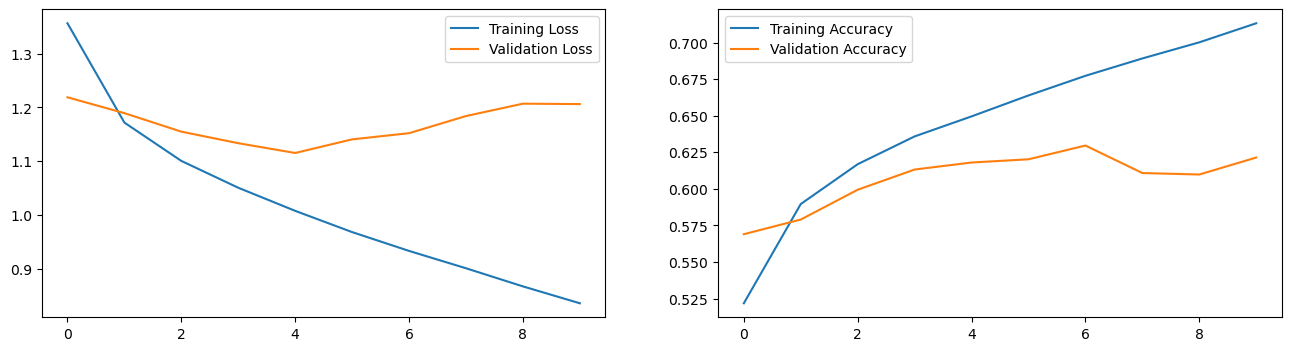

In [285]:
plot_history(history15)

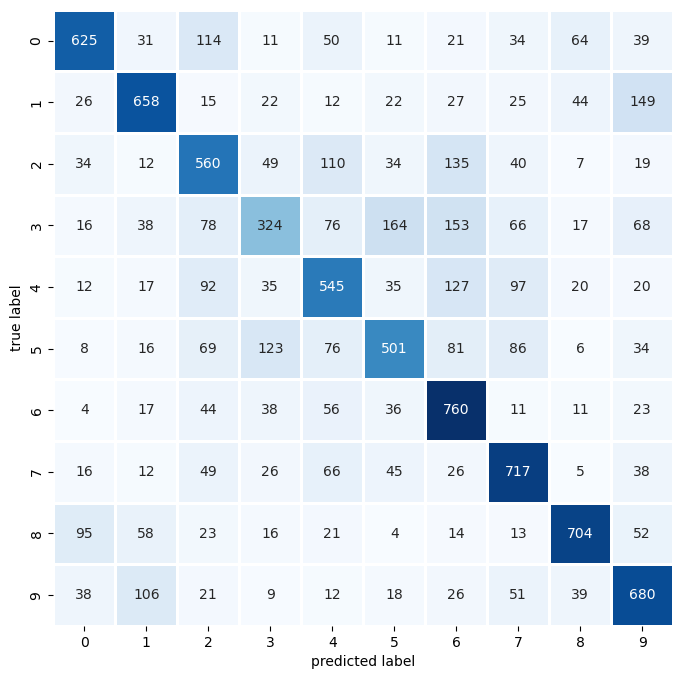

In [286]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred15)

Result 1

In [311]:
table = {
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5",
              "Model 6", "Model 7", "Model 8", "Model 9", "Model 10",
              "Model 11", "Model 12", "Model 13", "Model 14", "Model 15"],
    "Train Accuracy": [history1.history['accuracy'][9],history2.history['accuracy'][9],history3.history['accuracy'][9],
                      history4.history['accuracy'][9],history5.history['accuracy'][9],history6.history['accuracy'][9],
                      history7.history['accuracy'][9],history8.history['accuracy'][9],history9.history['accuracy'][9],
                      history10.history['accuracy'][9],history11.history['accuracy'][9],history12.history['accuracy'][9],
                      history13.history['accuracy'][9],history14.history['accuracy'][9],history15.history['accuracy'][9]],
    "Train Loss": [history1.history['loss'][9],history2.history['loss'][9],history3.history['loss'][9],
                      history4.history['loss'][9],history5.history['loss'][9],history6.history['loss'][9],
                      history7.history['loss'][9],history8.history['loss'][9],history9.history['loss'][9],
                      history10.history['loss'][9],history11.history['loss'][9],history12.history['loss'][9],
                      history13.history['loss'][9],history14.history['loss'][9],history15.history['loss'][9]],
    "Validation Accuracy":[history1.history['val_accuracy'][9],history2.history['val_accuracy'][9],history3.history['val_accuracy'][9],
                      history4.history['val_accuracy'][9],history5.history['val_accuracy'][9],history6.history['val_accuracy'][9],
                      history7.history['val_accuracy'][9],history8.history['val_accuracy'][9],history9.history['val_accuracy'][9],
                      history10.history['val_accuracy'][9],history11.history['val_accuracy'][9],history12.history['val_accuracy'][9],
                      history13.history['val_accuracy'][9],history14.history['val_accuracy'][9],history15.history['val_accuracy'][9]],
    "Validation Loss": [history1.history['val_loss'][9],history2.history['val_loss'][9],history3.history['val_loss'][9],
                      history4.history['val_loss'][9],history5.history['val_loss'][9],history6.history['val_loss'][9],
                      history7.history['val_loss'][9],history8.history['val_loss'][9],history9.history['val_loss'][9],
                      history10.history['val_loss'][9],history11.history['val_loss'][9],history12.history['val_loss'][9],
                      history13.history['val_loss'][9],history14.history['val_loss'][9],history15.history['val_loss'][9]],
    "Test Accuracy": [test_acc1,test_acc2,test_acc3,test_acc4,test_acc5,
                     test_acc6,test_acc7,test_acc8,test_acc9,test_acc10,
                     test_acc11,test_acc12,test_acc13,test_acc14,test_acc15],
    "Test Loss": [test_loss1,test_loss2,test_loss3,test_loss4,test_loss5,
                 test_loss6,test_loss7,test_loss8,test_loss9,test_loss10,
                 test_loss11,test_loss12,test_loss13,test_loss14,test_loss15,],
    "Process Time (s)":[second_elapsed_1,second_elapsed_2,second_elapsed_3,second_elapsed_4,second_elapsed_5,
                   second_elapsed_6,second_elapsed_7,second_elapsed_8,second_elapsed_9,second_elapsed_10,
                   second_elapsed_11,second_elapsed_12,second_elapsed_13,second_elapsed_14,second_elapsed_15]
}


In [312]:
df = pd.DataFrame(table)

# Display the DataFrame
print(df)

       Model  Train Accuracy  Train Loss  Validation Accuracy  \
0    Model 1        0.462133    1.519476               0.4236   
1    Model 2        0.469689    1.498754               0.4034   
2    Model 3        0.450222    1.295411               0.4248   
3    Model 4        0.647978    0.957031               0.5558   
4    Model 5        0.420378    1.623803               0.4420   
5    Model 6        0.417289    1.643814               0.4554   
6    Model 7        0.726844    0.826124               0.5974   
7    Model 8        0.735956    0.811004               0.7360   
8    Model 9        0.742467    0.750581               0.7476   
9   Model 10        0.660822    0.995474               0.6362   
10  Model 11        0.710711    0.861710               0.7428   
11  Model 12        0.703111    0.936456               0.6832   
12  Model 13        0.630044    1.168085               0.6718   
13  Model 14        0.370000    1.757060               0.3640   
14  Model 15        0.713

In [313]:
from IPython.display import HTML

# Convert DataFrame to HTML with smaller font size
html_table = df.to_html(index=False, classes='table table-striped table-bordered', col_space=100, justify='center')

# Apply CSS to the HTML table to set font size
html_table = html_table.replace('<th>', '<th style="font-size: 10px;">')
html_table = html_table.replace('<td>', '<td style="font-size: 10px;">')

# Display the HTML table
HTML(html_table)

Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss,Test Accuracy,Test Loss,Process Time (s)
Model 1,0.462133,1.519476,0.4236,1.688903,0.4288,1.662450,241
Model 2,0.469689,1.498754,0.4034,1.923219,0.4057,1.868380,252
Model 3,0.450222,1.295411,0.4248,1.414152,0.4337,1.414164,1727
Model 4,0.647978,0.957031,0.5558,1.271478,0.5421,1.292498,2457
Model 5,0.420378,1.623803,0.4420,1.584824,0.4431,1.566920,250
Model 6,0.417289,1.643814,0.4554,1.537414,0.4609,1.532369,254
Model 7,0.726844,0.826124,0.5974,1.221103,0.5988,1.256720,2495
Model 8,0.735956,0.811004,0.7360,0.836851,0.7308,0.851785,2369
Model 9,0.742467,0.750581,0.7476,0.746668,0.7206,0.813844,3001
Model 10,0.660822,0.995474,0.6362,1.100884,0.6233,1.130866,460
